## Import Libraries

In [94]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn import metrics

%matplotlib inline

In [96]:
# Clasifiction + Decision Tree

## Load the Data

In [18]:
df = pd.read_csv("H_player.csv")

In [20]:
df.shape

(4840, 19)

In [26]:
df.head(2)

team              position  height   age  appearance    goals  \
0  Manchester United            Goalkeeper   189.0  32.0         104  0.00000   
1  Manchester United  Defender Centre-Back   175.0  25.0          82  0.02809   

   assists  yellow cards  second yellow cards  red cards  goals conceded  \
0  0.00000      0.009585                  0.0        0.0        1.217252   
1  0.05618      0.224719                  0.0        0.0        0.000000   

   clean sheets  minutes played  days_injured  games_injured  award  \
0      0.335463            9390            42              5     13   
1      0.000000            6408           175             22      9   

   current_value  highest_value  
0       15000000       70000000  
1       50000000       50000000

In [24]:
df.drop(columns='Unnamed: 0' , inplace = True)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [28]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [team, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value]
Index: []

In [30]:
# Completeness
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [32]:
# Accurecy types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [34]:
c_col = [col for col in df.columns if df[col].dtype == "object"]
n_col = [col for col in df.columns if df[col].dtype != "object"]

In [36]:
for i in c_col:
    print(df[i].value_counts())

team
Chelsea FC                      28
Manchester United               26
AZ Alkmaar                      26
Liverpool FC                    25
AC Monza                        25
                                ..
Club Estudiantes de La Plata     1
Defensa y Justicia               1
Club Athletico Paranaense        1
Club Atlético Tigre              1
Ulsan Hyundai                    1
Name: count, Length: 335, dtype: int64
position
Defender Centre-Back          955
Attack Centre-Forward         584
midfield-CentralMidfield      581
Goalkeeper                    442
midfield-DefensiveMidfield    432
Defender Right-Back           431
Defender Left-Back            399
midfield-AttackingMidfield    321
Attack-RightWinger            311
Attack-LeftWinger             285
midfield-RightMidfield         38
midfield-LeftMidfield          33
Attack-SecondStriker           25
Attack                          1
Defender                        1
midfield                        1
Name: count, dtype

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [38]:
df.head(2)

team              position  height   age  appearance    goals  \
0  Manchester United            Goalkeeper   189.0  32.0         104  0.00000   
1  Manchester United  Defender Centre-Back   175.0  25.0          82  0.02809   

   assists  yellow cards  second yellow cards  red cards  goals conceded  \
0  0.00000      0.009585                  0.0        0.0        1.217252   
1  0.05618      0.224719                  0.0        0.0        0.000000   

   clean sheets  minutes played  days_injured  games_injured  award  \
0      0.335463            9390            42              5     13   
1      0.000000            6408           175             22      9   

   current_value  highest_value  
0       15000000       70000000  
1       50000000       50000000

In [40]:
c_col = ['team']

In [44]:
# one hot coding
df = pd.get_dummies(df, columns=c_col)

In [46]:
df.shape

(4840, 352)

In [48]:
encoder = LabelEncoder()
df['position'] = encoder.fit_transform(df['position'])  

#### 3. Feature selection

In [16]:
# sns.heatmap(df.corr(), annot=True);

In [50]:
correlation = df.corr()
correlation['position'].sort_values(ascending=False)

position          1.000000
yellow cards      0.135356
goals conceded    0.133292
clean sheets      0.129880
minutes played    0.064833
                    ...   
award            -0.044401
highest_value    -0.060210
height           -0.077749
assists          -0.192353
goals            -0.513394
Name: position, Length: 352, dtype: float64

In [52]:
# Set the correlation threshold
threshold = 0.1  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['position']) > threshold]['position'].index
selected_features

Index(['position', 'goals', 'assists', 'yellow cards', 'goals conceded',
       'clean sheets'],
      dtype='object')

#### 4. Prepare train and test data

In [54]:
# Prepare data
X = df.drop(['position'], axis=1)
y = df['position']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X.shape

(4840, 351)

## Buliding the Model

In [58]:
model = LogisticRegression()

## Train the Model

In [60]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [62]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [64]:
model.coef_

array([[ 7.17147009e-01, -3.16595211e-01,  1.52503072e-01, ...,
         1.47105514e-03,  8.55759951e-03,  8.18243861e-03],
       [ 9.97584954e-01,  5.41878206e-01,  1.76697225e+00, ...,
        -3.08402785e-02, -8.82718321e-02,  8.01591541e-02],
       [-1.29377974e+00, -1.24455282e-01,  1.12317756e+00, ...,
        -3.70992827e-02, -2.44345541e-02, -1.10396698e-01],
       ...,
       [ 5.62213228e-01, -1.82802840e-01, -1.58206818e-01, ...,
         3.42125495e-03,  1.65071271e-01,  1.50402377e-01],
       [-5.85544335e-01,  4.07579232e-01,  1.01802363e+00, ...,
         3.80809328e-04, -4.85846594e-02, -2.81162520e-02],
       [-6.25557656e-01,  2.15018347e-01,  5.43760768e-01, ...,
        -7.55036161e-04, -3.94663951e-02, -2.07302273e-02]])

In [66]:
print(model.intercept_) 

[-2.75601711 -0.07200046  0.79404281  1.38859084 -4.39827576 -2.96715892
  0.36077767  2.89527722  2.77842404 -0.45947163 -2.78579291  1.93976855
  4.37057849  3.18497983 -2.37036185 -1.90336082]


## Evaluating the Model 

In [68]:
# our benchmark model
base_model = round(df['position'].value_counts()[1]/df.shape[0]*100, 2)
base_model

12.07

1. Accuracy

In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

45.14462809917356

In [72]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy*100

68.69834710743802

2. Precision

In [74]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.29


3. Recall

In [76]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.29


4. F1 Score

In [78]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.29


#### Predictions vs. Real Values

In [80]:
predictions = model.predict(X_test_scaled)

In [82]:
Real_Values = np.array(y_test)
#Real_Values

#### Residual Histogram

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 91,   9,  11,   1,   0,   0,   0,   0,  11,  10,   1,   3,   1],
       [ 13,   9,  12,   4,   0,   0,   0,   0,  10,   7,   2,   0,   0],
       [ 12,  14,  11,   2,   0,   1,   0,   0,   8,   8,   2,   2,   1],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 153,   4,  14,   0,   0,   1,  13,   0,   0],
       [  1,   1,   0,   0,  14,   9,  26,   0,   1,  12,  13,   1,   0],
       [  0,   2,   1,   0,  11,  22,   9,   0,   0,  20,  12,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,  85,   0,   0,   0,   0,   0],
       [  7,  12,  11,   0,   2,   4,   3,   0,  13,  12,   2,   0,   2],
       [  5,   2,   6,   0,   9,  10,  22,   0,   5,  38,  16,   2,   1],
       [  0,   2,   1,   1,  24,   4,  12,   0,   2,  21,  19,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   1,   4,   0,   0,   0],
       [  0,   1,   1,   0,   1,   0,   0,   0,   1,   3,   1,   0,   0]])

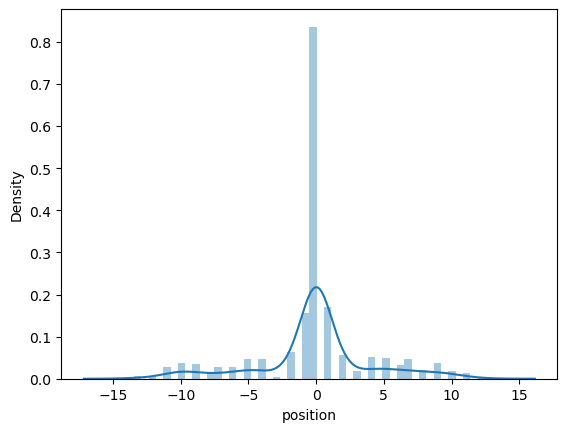

In [84]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

## Decision Tree


### Building the Model


In [153]:
model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()

### Train the Model

In [102]:
model1.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [104]:
model2.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

### Test the Model

In [107]:
y_pred = model1.predict(X_test_scaled)

In [109]:
y_pred = model2.predict(X_test_scaled)

### Evaluating thte Model

In [112]:
base_model = round(df['position'].value_counts()[1]/df.shape[0]*100, 2)
base_model

12.07

In [114]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

45.764462809917354

In [132]:
#Accuracy
y_pred_train = model1.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy*100

100.0

In [134]:
#Accuracy
y_pred_train = model2.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy*100

100.0

In [128]:
#Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.31


In [126]:
#Precision
y_pred_train = model1.predict(X_train_scaled)
precision = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [130]:
#Precision
y_pred_train = model2.predict(X_train_scaled)
precision = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [136]:
#Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.31


In [138]:
#Recall
y_pred_train = model1.predict(X_train_scaled)
recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 1.00


In [142]:
#Recall
y_pred_train = model2.predict(X_train_scaled)
recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 1.00


In [144]:
#F1
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.31


In [146]:
#F1
y_pred_train = model1.predict(X_train_scaled)
f1 = f1_score(y_train,y_pred_train,average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00


In [148]:
#F1
y_pred_train = model2.predict(X_train_scaled)
f1 = f1_score(y_train,y_pred_train,average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 1.00
